In [4]:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

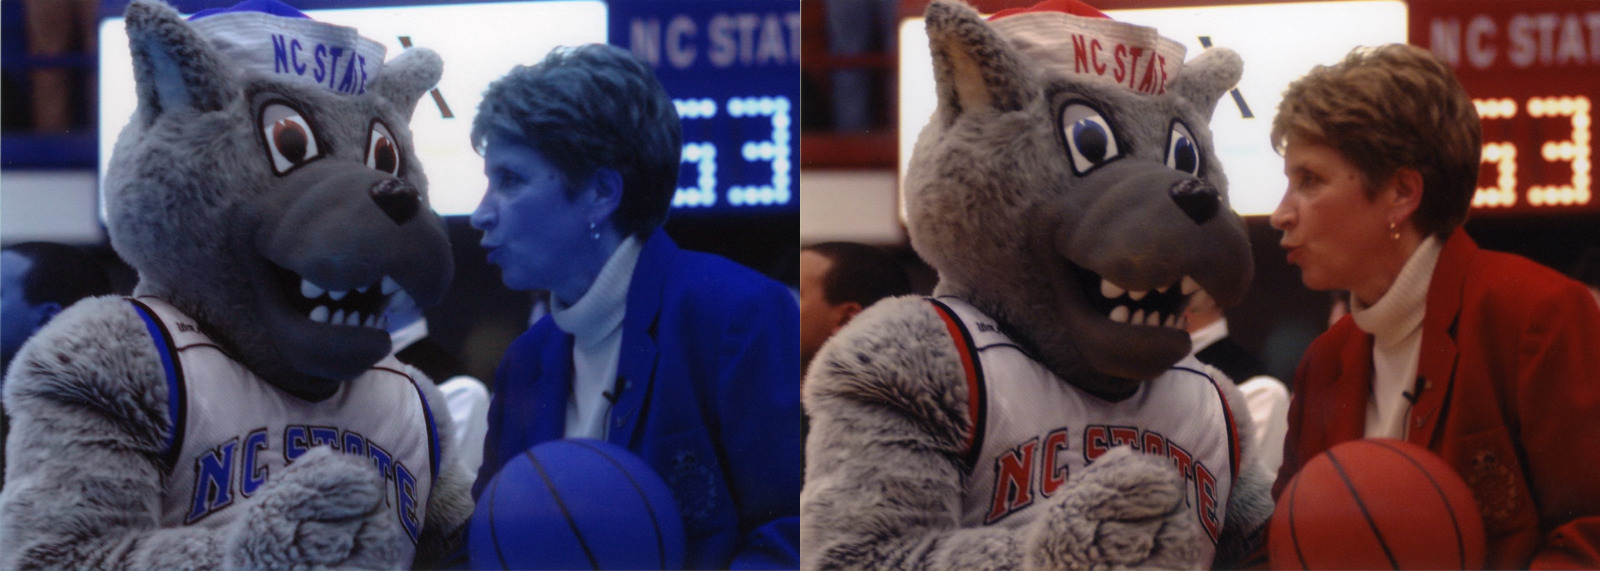

In [103]:
# Create a list to store the urls of the images
# urls = ["https://drive.google.com/uc?id=1wOGN7Pd-aYy3oiK7uMRnVc8eNtzbH1rv","https://drive.google.com/uc?id=1HmD5mb90t7UUv-02GbhOFm6obqX4wMqG",
# "https://drive.google.com/uc?id=1qzs5DnCp299kZrn21bKUmnCt9fFk4J0X",
# "https://drive.google.com/uc?id=19h_F6t1cvKBBGUFnJ5x2ifN5BsH3iOdF",
# "https://drive.google.com/uc?id=1YzwYwa11_yo7YZQSyVrmxXF1FqGOvD_G",
# "https://drive.google.com/uc?id=1XDTXFQi_ljSMp3kM_eD0K0NtfMNc3ybh"
# ]  
urls=["https://drive.google.com/uc?id=1XDTXFQi_ljSMp3kM_eD0K0NtfMNc3ybh"]
# Read and display the image
# loop over the image URLs, you could store several image urls in the list

for url in urls:
  image = io.imread(url) 
  image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
  final_frame = cv.hconcat((image, image_2))
  cv2_imshow(final_frame)
  print('\n')

In [40]:
# Check the image matrix data type (could know the bit depth of the image)
print(image.dtype)
# Check the height of image 
print(image.shape[0])
# Check the width of image 
print(image.shape[1])
# Check the number of channels of the image
print(image.shape[2])

uint8
571
800
3


In [18]:
histg = cv.calcHist([image],[0],None,[256],[0,256]) 

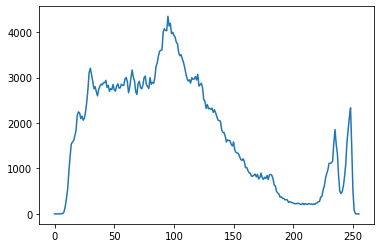

In [21]:
plt.plot(histg)
plt.show()

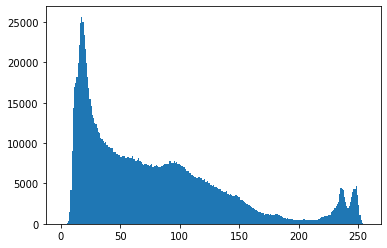

In [16]:
plt.hist(image.ravel(),bins = 256, range = [0,256]) 
plt.show()

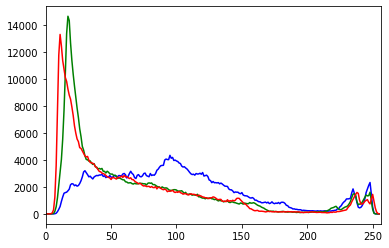

In [41]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([image],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

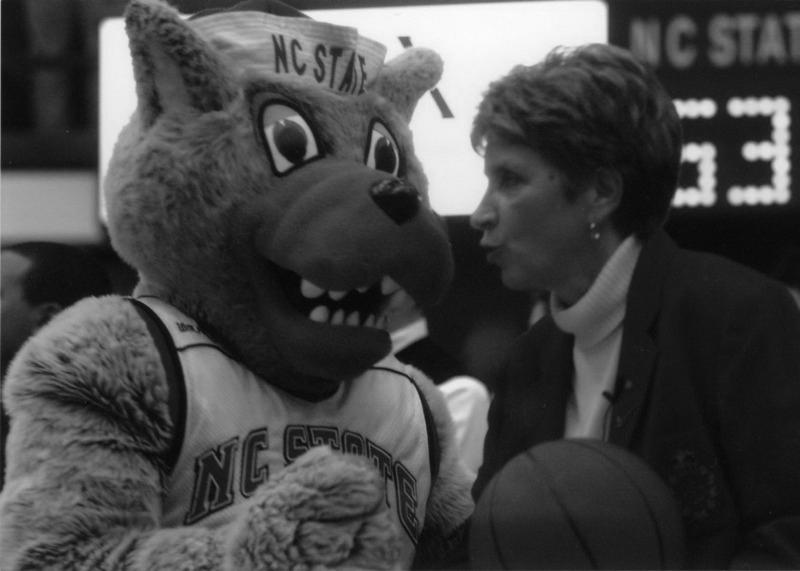

In [104]:
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

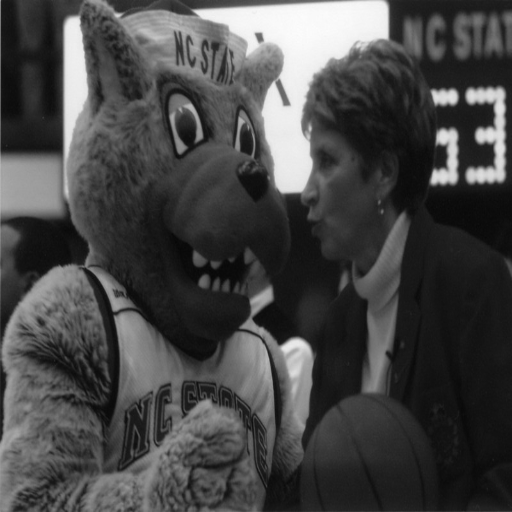

In [105]:
bigger = cv.resize(gray_image, (512, 512))
cv2_imshow(bigger)

In [106]:
df_2=pd.DataFrame(bigger)
df_2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511
0,150,42,32,26,28,28,26,25,26,26,28,27,27,32,36,39,43,49,54,57,59,62,57,55,58,58,58,57,56,55,55,53,52,55,57,56,53,53,51,51,...,33,34,34,34,33,34,35,34,35,33,32,32,33,33,30,31,30,30,32,33,32,30,31,33,34,35,35,34,33,31,34,37,37,37,39,38,35,34,33,34
1,133,32,29,24,26,24,23,23,24,26,26,26,27,30,35,38,43,48,52,56,58,60,58,57,59,57,56,57,57,55,53,54,53,53,53,50,50,49,49,51,...,30,30,29,29,31,31,31,30,30,29,28,29,31,30,30,32,30,29,30,30,30,29,28,30,30,29,31,30,29,29,30,31,31,31,31,32,30,31,29,30
2,125,29,27,23,25,23,24,24,24,24,23,24,26,28,32,37,43,48,52,57,60,62,58,57,58,56,54,56,56,53,51,52,52,52,53,52,46,45,46,49,...,30,29,28,29,32,30,30,29,28,27,28,30,31,30,31,32,31,30,30,29,31,31,28,29,29,29,30,28,28,30,30,30,29,29,29,28,28,30,28,28
3,126,30,26,23,24,24,24,24,23,22,22,23,24,28,32,35,42,48,52,57,62,63,59,57,58,56,57,57,56,54,52,50,52,50,51,52,49,46,46,47,...,28,28,28,29,32,32,30,30,29,27,28,30,31,30,30,31,30,29,29,28,30,31,29,29,30,28,28,27,29,30,30,30,29,29,29,29,31,32,28,29
4,126,30,25,24,24,22,22,23,22,21,23,22,23,28,30,33,39,45,51,56,61,62,60,58,58,58,58,57,56,55,55,52,52,48,47,48,50,47,46,46,...,28,27,27,28,30,31,30,29,29,28,29,30,30,29,28,28,28,28,29,27,28,29,28,28,29,27,26,27,29,29,28,28,28,29,28,31,33,32,29,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,132,132,135,135,135,136,134,131,125,114,109,95,84,73,62,50,40,33,30,29,28,28,32,38,44,52,58,59,59,61,66,65,62,66,79,86,89,87,87,77,...,33,37,35,37,39,34,40,37,33,33,33,33,33,33,34,33,32,33,33,33,31,31,33,31,31,30,30,29,29,29,28,26,28,28,27,26,27,28,32,36
508,136,135,138,137,140,140,140,133,124,114,107,96,88,71,56,45,39,33,30,29,27,26,31,38,39,45,49,57,67,73,82,80,79,81,90,91,91,86,86,75,...,33,35,33,39,37,32,35,38,35,34,34,34,34,34,34,34,33,32,33,34,32,33,34,33,34,32,32,31,29,31,29,28,30,30,28,28,29,29,31,32
509,135,133,135,140,140,143,142,136,124,112,104,94,85,64,47,40,38,34,33,33,33,33,38,39,38,40,46,60,76,83,91,87,86,87,95,100,95,86,79,68,...,34,34,35,37,34,33,33,38,37,34,34,34,33,33,33,34,34,32,32,34,34,33,34,35,35,35,34,33,32,30,31,31,32,31,31,30,30,30,30,30
510,133,127,129,136,137,137,135,129,119,108,99,87,74,55,44,39,39,40,43,46,47,46,50,45,43,43,48,64,77,85,90,90,88,89,95,101,94,85,75,66,...,35,34,34,34,34,34,33,38,37,33,33,34,34,34,33,33,35,34,33,35,35,34,34,36,36,36,38,36,35,34,35,35,35,34,34,35,35,34,35,35


In [107]:
image_arr6=np.ravel(bigger)


In [108]:
df_new = pd.DataFrame([image_arr2,image_arr3,image_arr4,image_arr5,image_arr,image_arr6])

In [110]:
df_new.to_csv('Train_images.csv')